# Pilot Data Analysis

In [1]:
from pilot_processing import *

C:\Users\dongm\Anaconda3\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


# 1. Import Data

## 1.2. 모든 데이터 dataframe으로 저장

In [2]:
# file list
dir_data = 'C:/Users/dongm/COSMOCHAIN/Data/COSMEE/Pilot/'
dir_output = 'C:/Users/dongm/COSMOCHAIN/Data/'
filelist =os.listdir(dir_data)

# survey answer 파일 경로
dir_survey = 'C:/Users/dongm/COSMOCHAIN/Data/COSMEE/정리/'
filename_survey = 'survey.xlsx'

# 파일 dataframe에 저장    
dic_data = saveAllFile(dir_data, filelist)

# survey 
survey_answers = pd.read_excel(dir_survey + filename_survey, sheet_name=3)
survey_questions=pd.read_excel(dir_survey + filename_survey, sheet_name=4)

print('설문조사에 참여한 사람 :',len(set(survey_answers['userid'])),'명')

comments.csv reading
comments_update.csv reading
downvote.csv reading
posts.csv reading
posts_tags.csv reading
recomments.csv reading
recomments_update.csv reading
sort.csv reading
user.csv reading
users_update.csv reading
vote.csv reading
설문조사에 참여한 사람 : 2192 명


# 2. 가공

## 2.1. column 정리

### Survey Answer : Pivot Table (by question id, answer)

In [3]:
survey_answers = survey_answers.sort_values(by=['userid','questionid'])
survey_answers = survey_answers.pivot('userid','questionid','answer')

In [4]:
survey_questions['questionId (S)'][1]
survey_questions.head(1)

,questionId (S),description (S),options (L),step (N),surveySet (S),title (S),type (S),maxAnswerCount (N),previousQuestionId (S),minAnswerCount (N)
0,1-1-0,당신의 성별은 무엇인가요?,"[ { ""M"" : { ""description"" : { ""S"" : ""여자""...",1,e0222cae-ca95-4f96-8efe-2654e49c232d,demo,SINGLE,NaN,NaN,NaN


### tag sorting

In [5]:
sortoftag = dic_data['sort.csv']
sortoftag.head()

,태그,횟수,분류
0,코스미,7874,기타
1,보습,3453,기능
2,향수,2803,카테고리별
3,메이크업,2241,메이크업
4,립스틱,2104,카테고리별


### User : basicskininfo 쪼개고, age는 현재 기준

### user : 최초 가입 시

In [6]:
user = dic_data['user.csv']
user = setUser(user)

user = user.sort_values(by='userid', ascending=False)
user = user.reset_index(drop=True)

# user = user.set_index('userid')

### users_update : 가입후 정보변경

In [7]:
users_update = dic_data['users_update.csv']
users_update = setUser(users_update)

users_update = users_update.sort_values(by=['userid','age','skinConcern1'], ascending=False)

users_update = users_update.drop_duplicates(subset='userid')

users_update = users_update.reset_index(drop=True)

## 2.2. update data

In [8]:
'''
def applyUpdate(df1, df2):
    cnt=0
    print('전체 데이터 개수 :',len(df1))
    for i in range(len(df1)):
        if df1['userid'][i]==df2['userid'][cnt]:
            df1.iloc[i]=df2.iloc[cnt]
            cnt+=1
            
        if i%1000 == 0:
            print('df1 row =', i,'df2 row =',cnt)
    return df1

user = applyUpdate(user, users_update)
user.head()
'''

print('시간이 너무 오래걸려서 고민 필요!')


시간이 너무 오래걸려서 고민 필요!


In [9]:
# user.to_csv(dir_output+'users_final.csv')
dir_total = 'C:/Users/dongm/COSMOCHAIN/Data/COSMEE'
user_total = pd.read_csv(dir_total+'users_final.csv', encoding='UTF-8')
user_total['skinConcerns'] = '"'+user_total['skinConcern1'] +'","'+ user_total['skinConcern2'] + '","' +user_total['skinConcern3']+'"'
user_total = user_total.drop(columns=['Unnamed: 0','skinConcern1','skinConcern2','skinConcern3'])

user_total = change_skinConcerns(user_total)

## 2.3 결합

### 2.3.1 tag + posts, comments, recomments, votes, downvotes

In [10]:
'''
tags_recomments = join_tags_activity('recomments.csv')
tags_comments = join_tags_activity('comments.csv')
tags_downvote = join_tags_activity('downvote.csv')
tags_vote = join_tags_activity('vote.csv')
'''
tags_posts = join_tags_activity(dic_data, 'posts.csv')

posts.csv join complete!


In [11]:
caller  = tags_posts
other = user_total

user_posts = caller.set_index('authorid').join(other.set_index('userid'))
user_posts.tail(3)

,postid,name,age,gender,skinTone,skinType,skinConcerns
ffffe04b-cc6d-42ed-bdff-d34c1f681145,55d23326-3ded-41f0-b25e-86f39b23de44,쿠션,28,FEMALE,MIDDLE,COMBINATION,"[""WHITENING"",""BLACKHEAD"",""DRY""]"
ffffe04b-cc6d-42ed-bdff-d34c1f681145,4a0143e6-7ccf-48cc-a5cb-02604f1247cc,진저,28,FEMALE,MIDDLE,COMBINATION,"[""WHITENING"",""BLACKHEAD"",""DRY""]"
ffffe04b-cc6d-42ed-bdff-d34c1f681145,ff65479e-49a6-4027-8f48-d7a38c3219ce,입생로랑틴트,28,FEMALE,MIDDLE,COMBINATION,"[""WHITENING"",""BLACKHEAD"",""DRY""]"


In [12]:
user_posts.index.name = 'userid'
user_posts = user_posts.reset_index()
print('전체 tag 개수 :',len(user_posts))

전체 tag 개수 : 250423


In [14]:
postUserSurvey = user_posts.join(survey_answers,on='userid')
postUserSurvey = postUserSurvey.sort_values(by='userid')
postUserSurvey = postUserSurvey.reset_index(drop=True)
# del dic_data

# 3.분석

## 3.1. 태그 선택

### 전체 태그

In [15]:
total_tag = getTagSummary(postUserSurvey)

C:\Users\dongm\Anaconda3\lib\site-packages\pandas\core\indexes\api.py:107: RuntimeWarning: '<' not supported between instances of 'int' and 'str', sort order is undefined for incomparable objects
  result = result.union(other)
C:\Users\dongm\Anaconda3\lib\site-packages\pandas\core\frame.py:7397: RuntimeWarning: '<' not supported between instances of 'int' and 'str', sort order is undefined for incomparable objects
  index = _union_indexes(indexes)
C:\Users\dongm\Anaconda3\lib\site-packages\pandas\core\frame.py:7397: RuntimeWarning: '<' not supported between instances of 'str' and 'int', sort order is undefined for incomparable objects
  index = _union_indexes(indexes)


In [15]:
%%capture cap --no-stderr
result_brand(total_tag, 'total',survey_questions, topN=8)

In [16]:
with open(dir_output+'summary_total.txt', 'w') as out: out.write(cap.stdout)

### 미샤 태그 사용 유저

In [17]:
missha = getTagSummary(postUserSurvey,'미샤')

C:\Users\dongm\Anaconda3\lib\site-packages\pandas\core\indexes\api.py:107: RuntimeWarning: '<' not supported between instances of 'int' and 'str', sort order is undefined for incomparable objects
  result = result.union(other)
C:\Users\dongm\Anaconda3\lib\site-packages\pandas\core\frame.py:7397: RuntimeWarning: '<' not supported between instances of 'int' and 'str', sort order is undefined for incomparable objects
  index = _union_indexes(indexes)
C:\Users\dongm\Anaconda3\lib\site-packages\pandas\core\frame.py:7397: RuntimeWarning: '<' not supported between instances of 'str' and 'int', sort order is undefined for incomparable objects
  index = _union_indexes(indexes)


In [18]:
%%capture cap --no-stderr
result_brand(missha, '미샤' ,survey_questions)

In [19]:
with open(dir_output+'summary_missha.txt', 'w') as out: out.write(cap.stdout)

### 이니스프리 태그 사용 유저

In [20]:
innisfree = getTagSummary(postUserSurvey,'이니스프리')

C:\Users\dongm\Anaconda3\lib\site-packages\pandas\core\indexes\api.py:107: RuntimeWarning: '<' not supported between instances of 'int' and 'str', sort order is undefined for incomparable objects
  result = result.union(other)
C:\Users\dongm\Anaconda3\lib\site-packages\pandas\core\frame.py:7397: RuntimeWarning: '<' not supported between instances of 'int' and 'str', sort order is undefined for incomparable objects
  index = _union_indexes(indexes)
C:\Users\dongm\Anaconda3\lib\site-packages\pandas\core\frame.py:7397: RuntimeWarning: '<' not supported between instances of 'str' and 'int', sort order is undefined for incomparable objects
  index = _union_indexes(indexes)


In [21]:
%%capture cap --no-stderr
result_brand(innisfree, '이니스프리', survey_questions)

In [22]:
with open(dir_output+'summary_innisfree.txt', 'w') as out: out.write(cap.stdout)

## 3.2 유저의 속성 선택 -> 태그 리스트 보기

In [13]:
def getTagList(tags):
    tags_posts = tags
    user_tag = {}
    prev_authorid = ''
    for i, authorid in enumerate(tags_posts['authorid']):
        if authorid != prev_authorid:
            user_tag[authorid] = '"'+tags_posts['name'][i]+'"'
        else:
            user_tag[authorid] = user_tag[authorid] +',"' + tags_posts['name'][i]+'"'
        prev_authorid = authorid

    user_taglist = pd.DataFrame(dict(userid=list(user_tag.keys()),taglist=list(user_tag.values())))
    return user_taglist

In [14]:
taglist = getTagList(tags_posts)
user_taglist  = user_total.set_index('userid').join(taglist.set_index('userid'))

In [16]:
postUserSurvey = user_taglist.join(survey_answers,on='userid')
postUserSurvey = postUserSurvey.sort_values(by='userid')
postUserSurvey = postUserSurvey.reset_index(drop=True)
# del dic_data

In [17]:
import math

In [18]:
tag_list = []
for tags in postUserSurvey['taglist']:
    if isinstance(tags, str):
        tags = tags[1:-1]
        tags = tags.split('","')
        for tag in tags:
            tag_list.append(tag)
        
counter = Counter(tag_list)
counter.most_common(5)

[('코스미', 7923), ('보습', 3493), ('향수', 2953), ('메이크업', 2269), ('립스틱', 2124)]

### user 속성별 분류, 시각화

In [19]:
test = postUserSurvey[postUserSurvey['age']>30]

In [22]:
user_simple = user_taglist[user_taglist['age']>0]
user_simple = user_simple[user_simple['skinTone']!="#"]
user_simple = user_simple.reset_index()
user_simple = user_simple[['age','gender','skinTone','skinType']]

In [23]:
test = user_simple[['gender','skinTone','skinType']]

In [24]:
test.head()

,gender,skinTone,skinType
0,FEMALE,MIDDLE,COMBINATION
1,FEMALE,BRIGHT,COMBINATION
2,FEMALE,MIDDLE,DRY
3,MALE,MIDDLE,DRY
4,FEMALE,BRIGHT,COMBINATION


In [25]:
user_sum = []
for i in range(len(test)):
    gender = test['gender'][i]
    skinTone = test['skinTone'][i]
    skinType = test['skinType'][i]
    user = gender+' '+skinTone+' '+skinType
    user_sum.append(user)
            

In [31]:
# Counter(user_sum)

In [27]:
tt = test.replace(['MALE','FEMALE','BRIGHT','MIDDLE','DARK','DRY','NORMAL','COMBINATION','OILY'],[1,0,0,0.5,1,0,0.3,0.6,1])
tt = tt[['skinTone','skinType']]

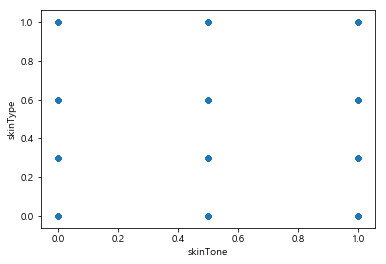

In [30]:
tt.plot.scatter(x='skinTone',y='skinType')